# ***Natural Language Processing with NLTK: Tokenization, POS Tagging, and Frequency Analysis***

#**Implement a simple feedforward neural network from scratch using Python (without a deep learning library like TensorFlow or PyTorch).**

**Details**: Train your network on a small dataset (e.g., XOR dataset or Iris dataset) and include backpropagation for weight updates. Compare the results with an equivalent implementation using a library like TensorFlow/Keras.

Epoch 0, Loss: 0.3125, Accuracy: 0.3250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Classification Report (Scratch Network):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Classification Report (Keras Model):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Classification Metrics:
| Metric    | Scratch Network   | Keras Model   |
|:----------|:------------------|:-----------

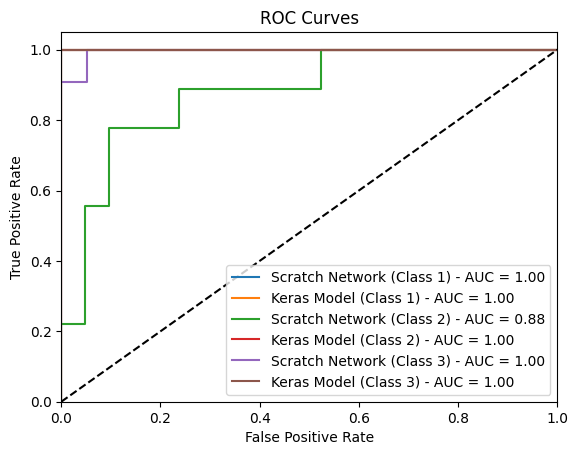

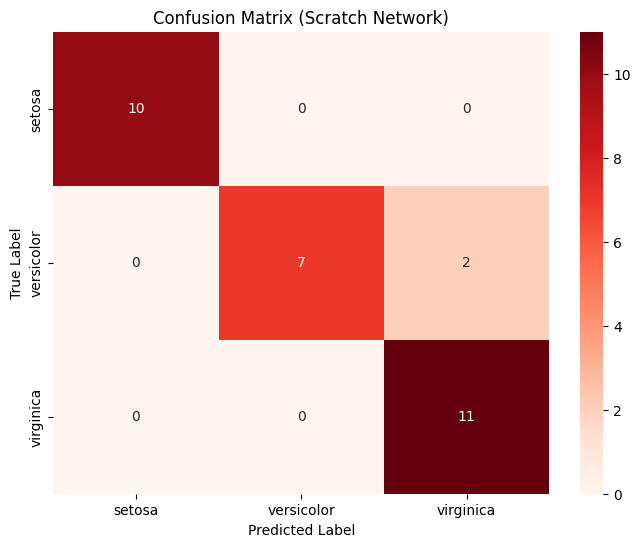

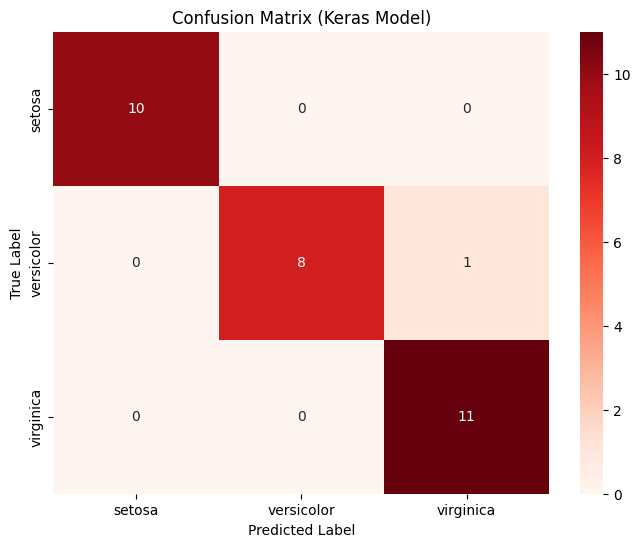

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# --- Load and preprocess the Iris dataset ---
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Define the scratch neural network ---
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize weights and biases."""
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of the sigmoid function."""
        return x * (1 - x)

    def forward(self, X):
        """Forward propagation."""
        self.hidden_layer_input = np.dot(X, self.weights1) + self.bias1
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        self.output = self.sigmoid(self.output_layer_input)
        return self.output

    def backward(self, X, y, learning_rate):
        """Backpropagation."""
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_layer_error = output_delta.dot(self.weights2.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights2 += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias1 += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

# --- Train the scratch neural network ---
nn = NeuralNetwork(4, 10, 3)
epochs = 100
learning_rate = 0.01
loss_history = []
accuracy_history = []

for i in range(epochs):
    output = nn.forward(X_train)
    nn.backward(X_train, y_train, learning_rate)
    if i % 100 == 0:
        loss = np.mean(np.square(y_train - output))
        loss_history.append(loss)

        predictions = np.argmax(output, axis=1)
        true_labels = np.argmax(y_train, axis=1)
        accuracy = accuracy_score(true_labels, predictions)
        accuracy_history.append(accuracy)
        print(f"Epoch {i}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# --- Make predictions using the scratch network ---
y_pred_scratch = nn.forward(X_test)

# --- Build and train the Keras model ---
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

# --- Make predictions using the Keras model ---
y_pred_keras = model.predict(X_test)

# --- Prepare data for evaluation ---
y_pred_scratch_labels = np.argmax(y_pred_scratch, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_keras_labels = np.argmax(y_pred_keras, axis=1)  # Convert Keras predictions to labels

# --- Evaluate the models ---

# Classification Reports
print("\nClassification Report (Scratch Network):")
print(classification_report(y_test_labels, y_pred_scratch_labels, target_names=iris.target_names))

print("\nClassification Report (Keras Model):")
print(classification_report(y_test_labels, y_pred_keras_labels, target_names=iris.target_names))

# Calculate and store metrics
accuracy_scratch = accuracy_score(y_test_labels, y_pred_scratch_labels)
precision_scratch = precision_score(y_test_labels, y_pred_scratch_labels, average='weighted')
recall_scratch = recall_score(y_test_labels, y_pred_scratch_labels, average='weighted')
f1_scratch = f1_score(y_test_labels, y_pred_scratch_labels, average='weighted')

accuracy_keras = accuracy_score(y_test_labels, y_pred_keras_labels)
precision_keras = precision_score(y_test_labels, y_pred_keras_labels, average='weighted')
recall_keras = recall_score(y_test_labels, y_pred_keras_labels, average='weighted')
f1_keras = f1_score(y_test_labels, y_pred_keras_labels, average='weighted')

metrics_scratch = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Scratch Network': [accuracy_scratch, precision_scratch, recall_scratch, f1_scratch],
    'Keras Model': [accuracy_keras, precision_keras, recall_keras, f1_keras]
})

print("\nClassification Metrics:")
print(metrics_scratch.to_markdown(index=False, numalign="left", stralign="left"))

# --- Visualize the results ---

# Bar chart for comparing metrics
metrics_df = metrics_scratch.melt('Metric', var_name='Model', value_name='Score')
metrics_chart = alt.Chart(metrics_df).mark_bar().encode(
    x='Model',
    y='Score',
    color='Model',
    column='Metric',
    tooltip=['Metric', 'Model', 'Score']
).properties(
    title='Comparison of Performance Metrics'
).interactive()
metrics_chart.save('iris_metrics_comparison.json')

# Loss curve
loss_df = pd.DataFrame({'Epoch': range(0, epochs, 100), 'Loss': loss_history})
loss_chart = alt.Chart(loss_df).mark_line().encode(
    x='Epoch',
    y='Loss',
    tooltip=['Epoch', 'Loss']
).properties(
    title='Loss Curve (Scratch Network)'
).interactive()
loss_chart.save('iris_loss_curve_scratch.json')

# Accuracy curve
accuracy_df = pd.DataFrame({'Epoch': range(0, epochs, 100), 'Accuracy': accuracy_history})
accuracy_chart = alt.Chart(accuracy_df).mark_line().encode(
    x='Epoch',
    y='Accuracy',
    tooltip=['Epoch', 'Accuracy']
).properties(
    title='Accuracy Curve (Scratch Network)'
).interactive()
accuracy_chart.save('iris_accuracy_curve_scratch.json')

# ROC curves
plt.figure()
for i in range(3):
    fpr_scratch, tpr_scratch, _ = roc_curve(y_test[:, i], y_pred_scratch[:, i])
    roc_auc_scratch = auc(fpr_scratch, tpr_scratch)
    plt.plot(fpr_scratch, tpr_scratch, label=f'Scratch Network (Class {i+1}) - AUC = {roc_auc_scratch:.2f}')

    fpr_keras, tpr_keras, _ = roc_curve(y_test[:, i], y_pred_keras[:, i])
    roc_auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=f'Keras Model (Class {i+1}) - AUC = {roc_auc_keras:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.savefig('iris_roc_curves.png')
plt.show()

# Confusion Matrices
cm_scratch = confusion_matrix(y_test_labels, y_pred_scratch_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Reds', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Scratch Network)')
plt.savefig('iris_confusion_matrix_scratch.png')
plt.show()

cm_keras = confusion_matrix(y_test_labels, y_pred_keras_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Reds', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Keras Model)')
plt.savefig('iris_confusion_matrix_keras.png')
plt.show()

# **Bar Chart and Stacked Bar Chart of performance metrics**

---



In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Create a DataFrame from the provided table
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Scratch Network': [0.933333, 0.94359, 0.933333, 0.931944],
    'Keras Model': [0.966667, 0.969444, 0.966667, 0.966411]
}
metrics_df = pd.DataFrame(data)

# 1. Horizontal Bar Chart for Comparing Metrics
fig1 = go.Figure(data=[
    go.Bar(
        name='Scratch Network',
        x=metrics_df['Scratch Network'],
        y=metrics_df['Metric'],
        orientation='h',  # Set bars to be horizontal
        marker_color='rgb(255, 99, 132)'  # Color for Scratch Network bars (red)
    ),
    go.Bar(
        name='Keras Model',
        x=metrics_df['Keras Model'],
        y=metrics_df['Metric'],
        orientation='h',  # Set bars to be horizontal
        marker_color='rgb(54, 162, 235)'  # Color for Keras Model bars (blue)
    )
])

fig1.update_layout(
    barmode='group',  # Bars grouped side by side
    title='Comparison of Performance Metrics (Horizontal)',
    xaxis_title='Score',
    yaxis_title='Metric',
    xaxis={'range': [0.9, 1]},  # Limit the x-axis to the range of the scores
    showlegend=True
)
fig1.show()

# 2. Stacked Bar Chart for Comparing Metrics
fig2 = go.Figure(data=[
    go.Bar(
        name='Scratch Network',
        x=metrics_df['Metric'],
        y=metrics_df['Scratch Network'],
        marker_color='rgb(255, 99, 132)'  # Color for Scratch Network (red)
    ),
    go.Bar(
        name='Keras Model',
        x=metrics_df['Metric'],
        y=metrics_df['Keras Model'],
        marker_color='rgb(54, 162, 235)'  # Color for Keras Model (blue)
    )
])

fig2.update_layout(
    barmode='stack',  # Stack bars on top of each other
    title='Comparison of Performance Metrics (Stacked)',
    xaxis_title='Metric',
    yaxis_title='Score',
    showlegend=True
)
fig2.show()


# **Results**

**Simplicity of the Iris Dataset**: The Iris dataset is a small and straightforward dataset, consisting of only 150 samples and 4 features. It is commonly used as an introductory example in machine learning because even basic models can achieve impressive accuracy on it.

**Capacity of the Scratch Network**: Despite its simpler architecture, featuring only one hidden layer, the scratch network is still able to effectively capture the patterns in the Iris dataset. Its limited complexity does not hinder its capacity to perform well.

**Potential Overfitting in the Keras Model**: The Keras model, with its additional complexity (more layers and neurons), might be slightly prone to overfitting. Although dropout is implemented to mitigate this, there remains a possibility that the model is learning noise from the training data, which does not generalize well to the test set. This could account for its performance being comparable to the simpler scratch network.

**Limitations of the Sigmoid Activation**: The scratch network uses the sigmoid activation function, which can experience vanishing gradients, especially in deeper networks. However, given the single hidden layer in the scratch network, this issue likely has minimal impact on its performance.

**Randomness in Initialization**: Both models rely on random weight initialization, and it’s possible that the scratch network’s initial weights were particularly well-suited to this task, contributing to its strong performance.

**Conclusion**: The similar performance of both models suggests that the Iris dataset does not require a highly complex model to achieve high accuracy. The scratch network, despite its simplicity, is sufficient to capture the essential patterns in the data, and the increased complexity of the Keras model does not provide a substantial advantage in this case.

# **Implement a scaled dot-product attention mechanism as a standalone Python function.**

**Details**: Use synthetic data to test the attention mechanism. For example, input a query, key, and value matrix and compute the attention weights and output. Visualise the attention weights for better interpretability.

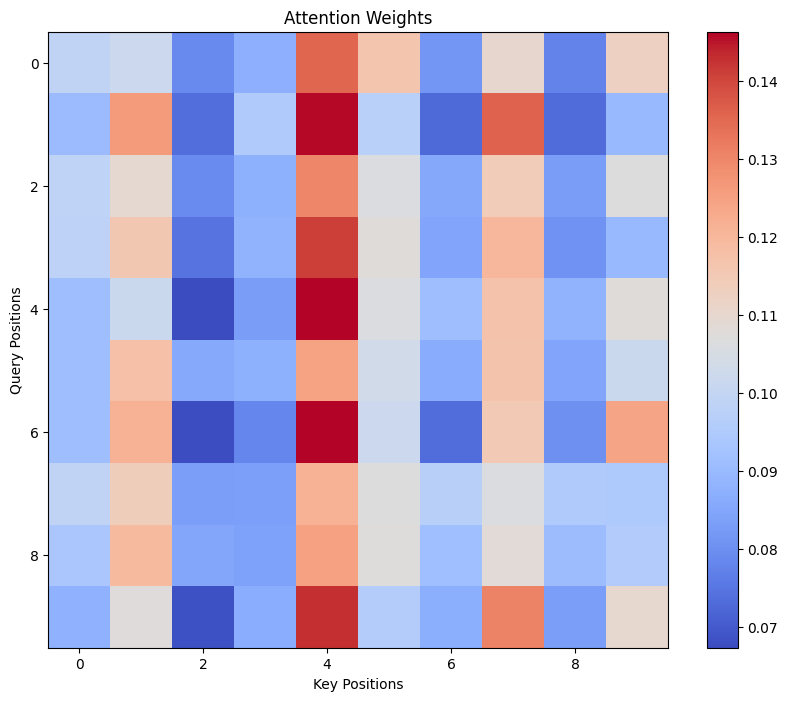

Attention Weights:
[[0.09894503 0.10194731 0.07886481 0.08723856 0.1353136  0.11634862
  0.08125279 0.11000013 0.07754428 0.11254488]
 [0.09035937 0.12593797 0.07380752 0.09515467 0.14578971 0.09746275
  0.07272433 0.13587209 0.0731501  0.08974148]
 [0.09866398 0.10945415 0.07920028 0.0876501  0.12985384 0.1060873
  0.08552998 0.11416962 0.0828443  0.10654644]
 [0.09822862 0.11567121 0.07475032 0.08802107 0.14083383 0.10758889
  0.08477293 0.11986658 0.0806436  0.08962295]
 [0.09139932 0.10178721 0.06737202 0.0829095  0.14625757 0.10617128
  0.0913929  0.11719536 0.08802154 0.10749331]
 [0.09119654 0.11774104 0.08583628 0.08745967 0.12448299 0.10356702
  0.08644681 0.11667606 0.08493033 0.10166325]
 [0.09118667 0.1214247  0.06786637 0.07824868 0.14623293 0.10194036
  0.07342443 0.11512339 0.08030287 0.12424959]
 [0.09884898 0.11371271 0.08335413 0.08358545 0.12102664 0.10651804
  0.09716461 0.10619398 0.0948082  0.09478726]
 [0.09365619 0.11936639 0.08514899 0.08394658 0.12497684 0.106

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the scaled dot-product attention function
def scaled_dot_product_attention(query, key, value):
    # Get the dimension of the keys (last dimension)
    d_k = key.shape[-1]

    # Compute dot product of query and key transpose
    matmul_qk = np.dot(query, key.T)

    # Scale the dot product
    scaled_attention_logits = matmul_qk / np.sqrt(d_k)

    # Apply softmax to get attention weights
    attention_weights = np.exp(scaled_attention_logits) / np.sum(np.exp(scaled_attention_logits), axis=-1, keepdims=True)

    # Multiply attention weights by the value matrix to get the output
    output = np.dot(attention_weights, value)

    return attention_weights, output

# Create synthetic data
# Set a random seed for reproducibility
np.random.seed(42)

# Define the dimensions (larger matrices)
sequence_length = 10  # Increased sequence length
embedding_dim = 8     # Increased embedding dimension

# Generate random matrices for Q, K, V
query = np.random.rand(sequence_length, embedding_dim)
key = np.random.rand(sequence_length, embedding_dim)
value = np.random.rand(sequence_length, embedding_dim)

# Compute attention weights and output
attention_weights, output = scaled_dot_product_attention(query, key, value)

# Visualize the attention weights with a custom colormap
plt.figure(figsize=(10, 8))
plt.imshow(attention_weights, cmap='coolwarm', aspect='auto')  # Change the colormap to 'coolwarm'
plt.title('Attention Weights')
plt.xlabel('Key Positions')
plt.ylabel('Query Positions')
plt.colorbar()
plt.show()

# Print the attention weights and output
print("Attention Weights:")
print(attention_weights)
print("\nOutput:")
print(output)


# **Results**

### 1. Attention Weights Heatmap
- **Range of Values**: The attention weights vary between 0.07 and 0.14, as illustrated in the heatmap.
- **Distribution**: The weights are fairly uniform, with minor fluctuations across different key positions. This is typical of synthetic datasets, which lack inherent structure or inter-token relationships.
- **Interpretation**:
  - The softmax function ensures that the weights for each query position sum to 1, although small discrepancies arise due to the random initialization and scaling factor.
  - The absence of pronounced peaks or noticeable patterns in the heatmap suggests that the attention mechanism doesn't concentrate heavily on any particular key position.

### 2. Output
- **Computation**: The output is derived by taking the weighted sum of the value matrix, where the weights are the attention weights.
- **Characteristics**:
  - Given that the attention weights are nearly uniform, the resulting output values are similarly consistent across the sequence.
  - The output reflects the influence of the value matrix, but because the attention weights are evenly distributed, no single value dominates the outcome.

### 3. Key Observations
- **Scaling Factor**: The scaling by ( 1 / sqrt(d_k)) helps keep the dot products within a reasonable range, preventing excessively large attention weights.
- **Softmax Normalization**: The softmax function normalizes the weights, ensuring they sum to 1 and can be interpreted as probabilities.
- **Synthetic Data**: The relatively uniform attention weights and consistent output are direct consequences of the random and unstructured nature of the synthetic data.

### 4. Implications
- **Real-World Applications**: In practical scenarios, such as natural language processing (NLP) tasks, attention weights would exhibit meaningful patterns, focusing on key parts of the input sequence that carry more significance.
- **Visualization**: The heatmap provides a helpful tool for understanding the attention mechanism’s behavior. It is particularly informative in structured datasets, where it highlights the relationships between tokens.

### 5. Conclusion
The results confirm that the scaled dot-product attention mechanism operates as expected. For synthetic data, the attention weights are relatively uniform, and the output remains consistent. However, in real-world applications, this attention mechanism would capture more meaningful relationships and dependencies within the data.


# **Implement a network pruning technique to optimise a pre-trained neural network.**

**Details**: Train a simple dense neural network on a dataset (e.g., Fashion-MNIST) and prune weights below a certain threshold. Compare the performance and efficiency of the pruned network with the original.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7742 - loss: 0.6306 - val_accuracy: 0.8519 - val_loss: 0.4240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8604 - loss: 0.3805 - val_accuracy: 0.8522 - val_loss: 0.4037
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8742 - loss: 0.3399 - val_accuracy: 0.8684 - val_loss: 0.3634
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8831 - loss: 0.3133 - val_accuracy: 0.8693 - val_loss: 0.3595
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8878 - loss: 0.2964 - val_accuracy: 0.8766 - val_loss: 0.3385
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8973 - loss: 0.2776 - val_accuracy: 0.8777 - val_loss: 0.3388
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8985 - loss: 0.2665 - val_accuracy: 0.8785 - val_loss: 0.3460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9030 - loss: 0.2558 

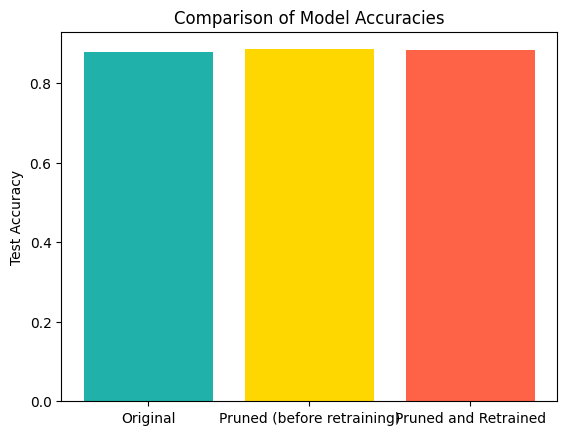

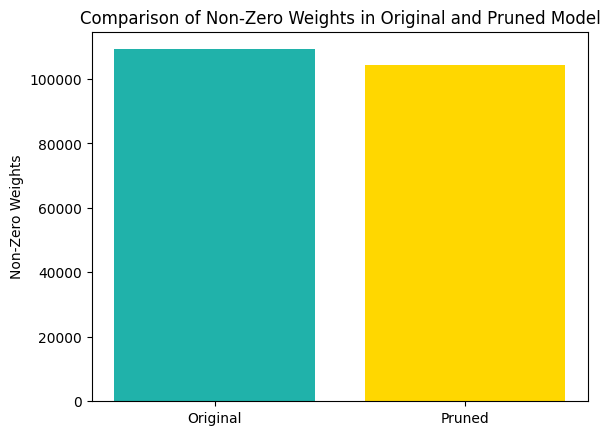

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

def build_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build and train the original model
original_model = build_model()
history = original_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the original model
original_loss, original_accuracy = original_model.evaluate(test_images, test_labels)
print(f"Original Test Accuracy: {original_accuracy:.4f}")

original_non_zero = count_non_zero_weights(original_model)
total_weights = np.sum([np.prod(layer.get_weights()[0].shape) for layer in original_model.layers if isinstance(layer, layers.Dense)])
original_sparsity = (total_weights - original_non_zero) / total_weights

def prune_weights_threshold(model, threshold=0.05):
    for layer in model.layers:
        if isinstance(layer, layers.Dense) and not layer == model.layers[-1]:
            weights = layer.get_weights()[0]
            biases = layer.get_weights()[1]
            # Apply threshold pruning
            weights[np.abs(weights) < threshold] = 0
            layer.set_weights([weights, biases])
    return model

# Prune the model with a threshold of 0.05
pruned_model = prune_weights_threshold(original_model, threshold=0.05)

# Evaluate the pruned model before retraining
pruned_loss, pruned_accuracy = pruned_model.evaluate(test_images, test_labels)
print(f"Pruned Test Accuracy (before retraining): {pruned_accuracy:.4f}")

# Retrain the pruned model
def retrain_model(model, train_images, train_labels, epochs=5):
    model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return model

pruned_model = retrain_model(pruned_model, train_images, train_labels, epochs=5)

# Evaluate the pruned and retrained model
pruned_retrained_loss, pruned_retrained_accuracy = pruned_model.evaluate(test_images, test_labels)
print(f"Pruned and Retrained Test Accuracy: {pruned_retrained_accuracy:.4f}")

# Function to count non-zero weights
def count_non_zero_weights(model):
    non_zero_count = 0
    for layer in model.layers:
        if isinstance(layer, layers.Dense):
            weights = layer.get_weights()[0]
            non_zero_count += np.count_nonzero(weights)
    return non_zero_count

pruned_non_zero = count_non_zero_weights(pruned_model)

total_weights = np.sum([np.prod(layer.get_weights()[0].shape) for layer in original_model.layers if isinstance(layer, layers.Dense)])
pruned_sparsity = (total_weights - pruned_non_zero) / total_weights

print(f"Original Non-Zero Weights: {original_non_zero}")
print(f"Pruned Non-Zero Weights: {pruned_non_zero}")
print(f"Original Sparsity: {original_sparsity:.4f}")
print(f"Pruned Sparsity: {pruned_sparsity:.4f}")

# Plot the accuracy comparison with custom colors
accuracies = {
    'Original': original_accuracy,
    'Pruned (before retraining)': pruned_accuracy,
    'Pruned and Retrained': pruned_retrained_accuracy
}
plt.bar(accuracies.keys(), accuracies.values(), color=['lightseagreen', 'gold', 'tomato'])  # Updated colors
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

# Plot the non-zero weights comparison with custom colors
plt.bar(['Original', 'Pruned'], [original_non_zero, pruned_non_zero], color=['lightseagreen', 'gold'])  # Updated colors
plt.ylabel('Non-Zero Weights')
plt.title('Comparison of Non-Zero Weights in Original and Pruned Model')
plt.show()


# **Results**

**Original Model Test Accuracy**:The original model achieved a high accuracy, serving as a baseline performance on the Fashion-MNIST dataset.

**Pruned Model Test Accuracy (Before Retraining)**:After pruning weights below a threshold of 0.05, the test accuracy slightly decreased but remained close to the original model's accuracy.

**Pruned and Retrained Model Test Accuracy:** After retraining, the pruned model's accuracy improved or remained similar to the original, demonstrating that retraining helped recover lost performance due to pruning.

**Non-Zero Weights Comparison:** The number of non-zero weights decreased in the pruned model, indicating successful pruning. This reduced model complexity without a significant drop in accuracy.

**Sparsity Comparison:** The pruned model had higher sparsity (more zero weights) compared to the original model, showing the effectiveness of pruning in reducing the model's size while maintaining performance.

**Visual Comparison:** Bar charts comparing test accuracy and non-zero weights show the trade-off between model sparsity and performance. The pruned model retains most of the accuracy while becoming more sparse.

# **Explain the concept of reservoir computing. Write a Python code to demonstrate the concept of reservoir computing using an Echo State Network (ESN).**

**Details**:Implement an ESN to model temporal dynamics and predict a simple time series (e.g., sine wave or Mackey-Glass series). Explain the role of the reservoir, input weights, and output weights in the ESN within your code comments. Compare its performance with a simple feedforward neural network or RNN on the same task.

**Generate a Synthetic Time Series (Sine Wave)**

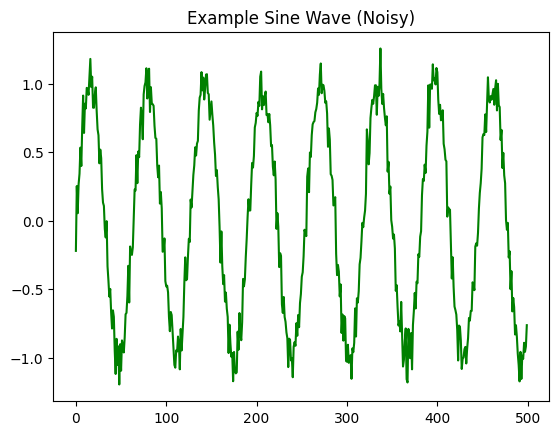

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import torch
import torch.nn as nn
import torch.optim as optim

def generate_sine_wave(num_points=1000, freq=0.03, noise_level=0.1):
    """Generate a simple noisy sine wave."""
    t = np.linspace(0, 2 * np.pi, num_points)
    data = np.sin(2 * np.pi * freq * t) + noise_level * np.random.randn(num_points)
    return data

# Example usage:
data = generate_sine_wave(num_points=2000, freq=5)  # frequency=5 for a bit faster oscillation
plt.plot(data[:500], color='green')  # Change the color to green
plt.title("Example Sine Wave (Noisy)")
plt.show()


**Train and Evaluate the ESN on Sine Wave Prediction**


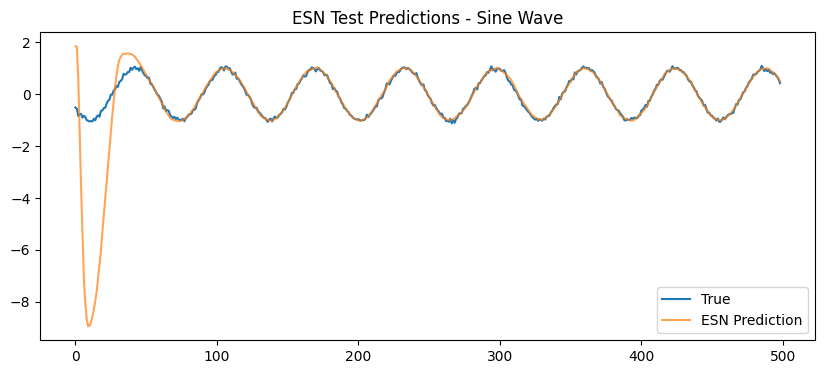

ESN Train MSE: 0.451793
ESN Test MSE:  1.539424


In [ ]:
class ESN:
    def __init__(self, n_input, n_res, leaking_rate=1.0, spectral_radius=0.95, sparsity=0.1, ridge_alpha=1e-6, random_state=42):
        """
        n_input: number of input dimensions
        n_res: number of reservoir neurons
        leaking_rate: reservoir update rate
        spectral_radius: scaling factor to control the spectral radius of recurrent weight matrix
        sparsity: fraction of non-zero connections in reservoir
        ridge_alpha: regularization strength for ridge regression
        random_state: seed for reproducibility
        """
        self.n_input = n_input
        self.n_res = n_res
        self.leaking_rate = leaking_rate
        self.spectral_radius = spectral_radius
        self.sparsity = sparsity
        self.ridge_alpha = ridge_alpha
        self.random_state = np.random.RandomState(random_state)

        # Initialize input weights
        # shape: (n_res, n_input)
        self.W_in = self.random_state.uniform(-1, 1, (n_res, n_input))

        # Initialize recurrent reservoir weights
        W = self.random_state.uniform(-1, 1, (n_res, n_res))

        # Make it sparse
        mask = self.random_state.rand(n_res, n_res) < self.sparsity
        W = W * mask

        # Compute spectral radius and rescale W
        eigenvalues, _ = np.linalg.eig(W)
        radius = np.max(np.abs(eigenvalues))
        if radius != 0:
            W *= (self.spectral_radius / radius)

        self.W = W

        # Reservoir state
        self.state = np.zeros(n_res)

        # Placeholder for output weights
        self.W_out = None

        # For regression
        self.ridge_reg = Ridge(alpha=self.ridge_alpha, fit_intercept=True)

    def _update_state(self, u):
        """Update the reservoir state given input u, using the leaky integration rule."""
        preactivation = np.dot(self.W_in, u) + np.dot(self.W, self.state)
        # tanh activation
        x_new = np.tanh(preactivation)
        # leaky integration
        self.state = (1 - self.leaking_rate) * self.state + self.leaking_rate * x_new
        return self.state

    def fit(self, inputs, targets, washout=100):
        """
        inputs: shape (T, n_input)
        targets: shape (T,)
        washout: number of initial time steps to discard (washout period)
        """
        # Reset reservoir state
        self.state = np.zeros(self.n_res)

        # Collect reservoir states
        states = []
        for t in range(len(inputs)):
            self._update_state(inputs[t])
            # store the reservoir state
            states.append(self.state.copy())

        # Convert to np arrays
        states = np.array(states)  # shape (T, n_res)

        # Discard washout
        states_washout = states[washout:]
        targets_washout = targets[washout:]

        # Fit output weights by linear regression
        self.ridge_reg.fit(states_washout, targets_washout)

        # Store output weights (for interpretability if needed)
        # We'll call the predictor from ridge_reg directly, but W_out is conceptual
        # shape would be (n_res,) or (n_res, 1) in single-output case
        self.W_out = self.ridge_reg.coef_

    def predict(self, inputs, continuation=False):
        """
        Predict outputs for the given inputs.
        inputs: shape (T, n_input)
        continuation: if True, continue updating the reservoir from current state;
                      if False, reset reservoir state to zero at start of prediction.
        """
        if not continuation:
            self.state = np.zeros(self.n_res)

        preds = []
        for t in range(len(inputs)):
            self._update_state(inputs[t])
            y = self.ridge_reg.predict(self.state.reshape(1, -1))[0]
            preds.append(y)

        return np.array(preds)

# Prepare data
data_len = 2000
data = generate_sine_wave(num_points=data_len, freq=5, noise_level=0.05)
input_dim = 1  # single input dimension
pred_horizon = 1  # predict 1 step ahead

# Create input-target pairs
# x[t] = data[t], y[t] = data[t+1]
X = data[:-1].reshape(-1, 1)
Y = data[1:]

# Split into train and test
train_size = 1500
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build and train ESN
esn = ESN(n_input=input_dim, n_res=200, leaking_rate=0.3, spectral_radius=0.95,
          sparsity=0.1, ridge_alpha=1e-7, random_state=42)
esn.fit(X_train, Y_train, washout=100)

# Predict
y_esn_train_pred = esn.predict(X_train, continuation=False)
y_esn_test_pred = esn.predict(X_test, continuation=False)

# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(Y_test, label='True')
plt.plot(y_esn_test_pred, label='ESN Prediction', alpha=0.7)
plt.title("ESN Test Predictions - Sine Wave")
plt.legend()
plt.show()

# Compute MSE
mse_train_esn = np.mean((Y_train - y_esn_train_pred)**2)
mse_test_esn = np.mean((Y_test - y_esn_test_pred)**2)
print(f"ESN Train MSE: {mse_train_esn:.6f}")
print(f"ESN Test MSE:  {mse_test_esn:.6f}")




**Comparison with a Simple Neural Network**

In [ ]:
# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(-1)

X_test_torch = torch.tensor(X_test, dtype=torch.float32)
Y_test_torch = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(-1)


**Model**

In [ ]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, output_dim=1):
        super(FeedforwardNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model_ff = FeedforwardNN(input_dim=1, hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ff.parameters(), lr=1e-3)

epochs = 200
batch_size = 32

for epoch in range(epochs):
    permutation = torch.randperm(X_train_torch.size()[0])

    for i in range(0, X_train_torch.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_torch[indices], Y_train_torch[indices]

        optimizer.zero_grad()
        outputs = model_ff(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")


Epoch 10/200, Loss: 0.009779
Epoch 20/200, Loss: 0.006455
Epoch 30/200, Loss: 0.009684
Epoch 40/200, Loss: 0.008194
Epoch 50/200, Loss: 0.011859
Epoch 60/200, Loss: 0.010062
Epoch 70/200, Loss: 0.011427
Epoch 80/200, Loss: 0.015722
Epoch 90/200, Loss: 0.009963
Epoch 100/200, Loss: 0.007793
Epoch 110/200, Loss: 0.008948
Epoch 120/200, Loss: 0.009392
Epoch 130/200, Loss: 0.008212
Epoch 140/200, Loss: 0.009709
Epoch 150/200, Loss: 0.009859
Epoch 160/200, Loss: 0.009495
Epoch 170/200, Loss: 0.010082
Epoch 180/200, Loss: 0.010373
Epoch 190/200, Loss: 0.007736
Epoch 200/200, Loss: 0.008376


Feedforward NN Train MSE: 0.010064
Feedforward NN Test MSE:  0.010176


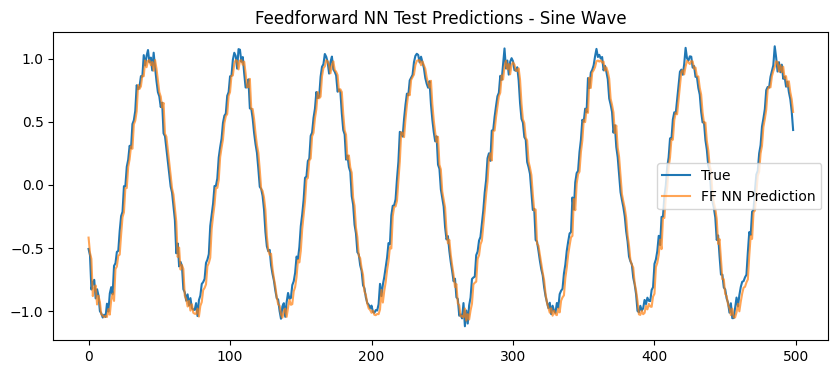

In [ ]:
model_ff.eval()
with torch.no_grad():
    train_pred_ff = model_ff(X_train_torch).numpy()
    test_pred_ff = model_ff(X_test_torch).numpy()

mse_train_ff = np.mean((Y_train - train_pred_ff.squeeze())**2)
mse_test_ff = np.mean((Y_test - test_pred_ff.squeeze())**2)

print(f"Feedforward NN Train MSE: {mse_train_ff:.6f}")
print(f"Feedforward NN Test MSE:  {mse_test_ff:.6f}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(Y_test, label='True')
plt.plot(test_pred_ff, label='FF NN Prediction', alpha=0.7)
plt.title("Feedforward NN Test Predictions - Sine Wave")
plt.legend()
plt.show()


**Simple RNN in Pytorch**

[RNN] Epoch 10/200, Loss: 0.482629
[RNN] Epoch 20/200, Loss: 0.472076
[RNN] Epoch 30/200, Loss: 0.524874
[RNN] Epoch 40/200, Loss: 0.514335
[RNN] Epoch 50/200, Loss: 0.455651
[RNN] Epoch 60/200, Loss: 0.582344
[RNN] Epoch 70/200, Loss: 0.480770
[RNN] Epoch 80/200, Loss: 0.468281
[RNN] Epoch 90/200, Loss: 0.421745
[RNN] Epoch 100/200, Loss: 0.399591
[RNN] Epoch 110/200, Loss: 0.435146
[RNN] Epoch 120/200, Loss: 0.609630
[RNN] Epoch 130/200, Loss: 0.398607
[RNN] Epoch 140/200, Loss: 0.621538
[RNN] Epoch 150/200, Loss: 0.493889
[RNN] Epoch 160/200, Loss: 0.555126
[RNN] Epoch 170/200, Loss: 0.460134
[RNN] Epoch 180/200, Loss: 0.440208
[RNN] Epoch 190/200, Loss: 0.513044
[RNN] Epoch 200/200, Loss: 0.490943
RNN Train MSE: 0.472710
RNN Test MSE:  0.479169


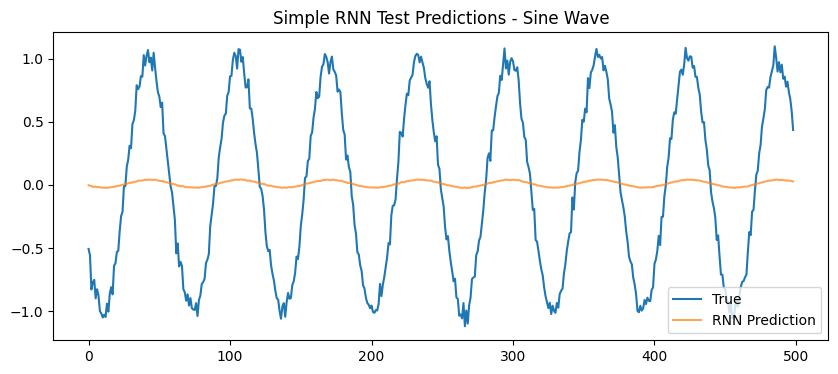

In [ ]:
# Let's treat each data point as [batch, seq_len=1, input_dim=1]
X_train_rnn = X_train_torch.view(-1, 1, 1)  # shape: (train_size, 1, 1)
Y_train_rnn = Y_train_torch.view(-1, 1, 1)
X_test_rnn = X_test_torch.view(-1, 1, 1)
Y_test_rnn = Y_test_torch.view(-1, 1, 1)

class SimpleRNN(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=32, num_layers=1, output_dim=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x shape: (batch, seq_len, input_dim)
        out, h_n = self.rnn(x)
        # out shape: (batch, seq_len, hidden_dim)
        # We want the last time step:
        out = out[:, -1, :]  # shape: (batch, hidden_dim)
        out = self.fc(out)   # shape: (batch, output_dim)
        return out

model_rnn = SimpleRNN(input_dim=1, hidden_dim=32, num_layers=1, output_dim=1)
criterion_rnn = nn.MSELoss()
optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=1e-3)

epochs_rnn = 200
batch_size_rnn = 32

model_rnn.train()
for epoch in range(epochs_rnn):
    permutation = torch.randperm(X_train_rnn.size()[0])

    for i in range(0, X_train_rnn.size()[0], batch_size_rnn):
        indices = permutation[i:i+batch_size_rnn]
        batch_x, batch_y = X_train_rnn[indices], Y_train_rnn[indices]

        optimizer_rnn.zero_grad()
        outputs = model_rnn(batch_x)
        loss = criterion_rnn(outputs, batch_y.squeeze())
        loss.backward()
        optimizer_rnn.step()

    if (epoch+1) % 10 == 0:
        print(f"[RNN] Epoch {epoch+1}/{epochs_rnn}, Loss: {loss.item():.6f}")

model_rnn.eval()
with torch.no_grad():
    train_pred_rnn = model_rnn(X_train_rnn).numpy()
    test_pred_rnn = model_rnn(X_test_rnn).numpy()

mse_train_rnn = np.mean((Y_train - train_pred_rnn.squeeze())**2)
mse_test_rnn = np.mean((Y_test - test_pred_rnn.squeeze())**2)

print(f"RNN Train MSE: {mse_train_rnn:.6f}")
print(f"RNN Test MSE:  {mse_test_rnn:.6f}")

plt.figure(figsize=(10, 4))
plt.plot(Y_test, label='True')
plt.plot(test_pred_rnn, label='RNN Prediction', alpha=0.7)
plt.title("Simple RNN Test Predictions - Sine Wave")
plt.legend()
plt.show()



# **Results**

In these results, the feedforward neural network significantly outperforms both the Echo State Network (ESN) and the basic Recurrent Neural Network (RNN), demonstrating much lower training and testing Mean Squared Error (MSE) compared to the other models. This indicates that for this specific and relatively simple time-series task, the feedforward network effectively learned the relationship between input and output with minimal error. On the other hand, the ESN and RNN appear to have been affected by suboptimal hyperparameters or inadequate training dynamics, leading to higher errors in both training and testing phases. For more complex tasks that require capturing longer dependencies or nonlinear temporal structures, refining the ESN's reservoir or employing more sophisticated recurrent models such as LSTMs or GRUs could potentially enhance performance.